In [1]:
source('init.r')

## Submitting to Kaggle

Predicting passenger survival during the sinking of the Titanic based upon passenger demographics is currently a prediction competition on the popular Predictive modeling competition website, Kaggle.com. Details for the competition are available here: https://www.kaggle.com/c/titanic

Having done our best to generate a predictive model using the input data, we are in a good position to submit predictions to this comptetion.

#### Progress Report

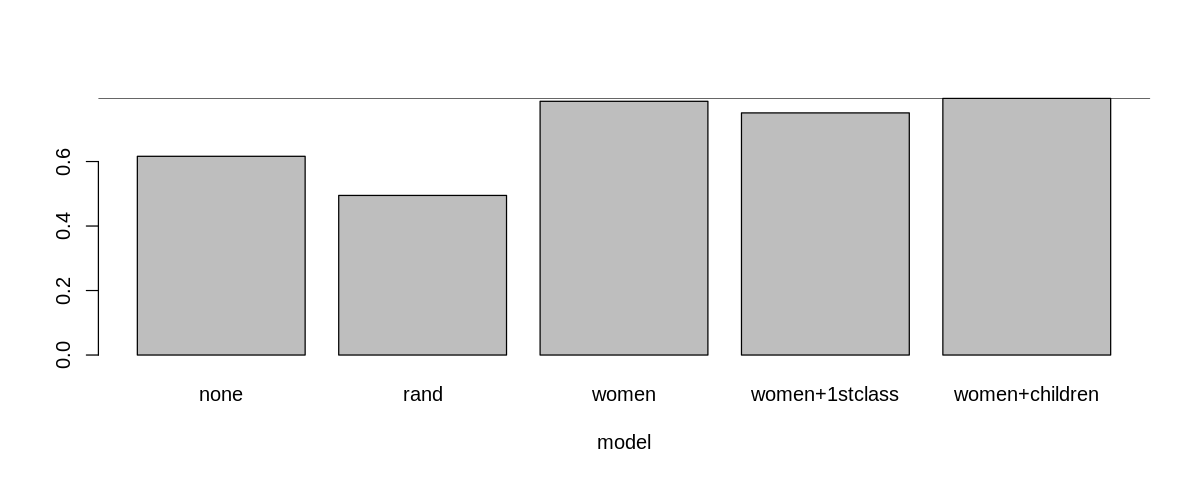

In [2]:
scores = c(accuracy(titanic$Survived, no_survivors),
           accuracy(titanic$Survived, random_model),
           accuracy(titanic$Survived, women_survived),
           accuracy(titanic$Survived, women_and_first_class_survived),
           accuracy(titanic$Survived, women_and_children_survived))

barplot(scores, xlab = 'model', 
        names.arg = c('none','rand','women', 'women+1stclass', 'women+children'))
abline(h = max(scores))

Our top performing model was built in the following way:

1. We loaded the training data.

   ```
   titanic <- read.csv('titanic.csv')
   ```

1. We counted the number of passengers in our data set.

   ```
   number_of_passengers = length(titanic$Survived)
   ```

1. We used this to generate a prediction vector consisting entirely of zeros.

    ```
    no_survivors <- rep(0, number_of_passengers)
    ```
    
1. We used masking to replace the prediction for female passengers with a value of 1.

    ```
    women_mask = titanic$Sex == 'female'
    women_survived = rep(no_survivors)
    women_survived[women_mask] = 1
    ```

1. We used masking to replace the prediction for children (passengers with an `age` less than 7)  with a value of 1.

    ```
    children_mask = titanic$Age < 7
    women_and_children_survived = rep(women_survived)
    women_and_children_survived[children_mask] = 1
    ```

We can use this exact model to submit our predictions to the competition.

### Obtain the Data

First, we should obtain and load the data directly from the competition website. This can be done on the "Data" tab (#1). Download the data to be used for prediction using the "Download" button (#2).

<img src="https://www.evernote.com/l/AAGMJUC9ZkRK1oFhQ9QrHRESJvFzoIjPcqUB/image.png" width=700px>

#### Sample Submission

The Data page contains a sample submission caled `gender_submission.csv`. We can look at this file to see what our submission should look like in terms of format.

    PassengerId,Survived
    892,0
    893,1
    894,0
    895,0
    896,1
    897,0
    898,1
    899,0
    900,1

We note that the sample submission is simply a two-column .csv file with a header row. The header row contains the column names `PassengerId` and `Survived`.

### Prepare Test Data Predictions

We can prepare our vector of test predictions using the same method outlined above, this time using the **test data**. Note that we will need to use `PassengerId` to count the number of passengers, `Survived` is not included in this dataset.

In [3]:
titanic = read.csv('test.csv')

number_of_passengers = length(titanic$PassengerId)
no_survivors = rep(0, number_of_passengers)

women_mask = titanic$Sex == 'female'
women_survived = rep(no_survivors)
women_survived[women_mask] = 1

children_mask = titanic$Age < 7
women_and_children_survived = rep(women_survived)
women_and_children_survived[children_mask] = 1

### Prepare and Submit Submission CSV file

In [4]:
head(titanic, n=2)

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S


In [5]:
titanic$Survived = women_and_children_survived

In [6]:
head(titanic, n=2)

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S,1


In [6]:
submission = titanic[,c('PassengerId', 'Survived')]

In [7]:
head(submission)

PassengerId,Survived
892,0
893,1
894,0
895,0
896,1
897,0


In [8]:
write.csv(submission, 'submission.csv', row.names=FALSE)